# Homework 7
DASC 512  
Richy Peterson

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')

In [2]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    It uses Locally Weighted Scatterplot Smoothing (LOWESS) to fit a model. 
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    pred = model.fittedvalues
    influence = model.get_influence()
    resid_std = influence.resid_studentized_internal
    
    fig, ax = plt.subplots(1,2, figsize=(7.5,3.5))
    
    sns.regplot(x=pred, y=y, lowess=True, ax=ax[0], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=yhat) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[min(pred), max(pred)], 
                 ax=ax[0], color='red', ls=':')
    ax[0].set_title('Observed vs. Predicted Values')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Observed')
    
    sns.regplot(x=pred, y=resid_std, lowess=True, ax=ax[1], line_kws={'color':'darkorchid'})
    # I've added the ideal line (y=0) for comparison
    sns.lineplot(x=[min(pred), max(pred)], y=[0,0], ax=ax[1], color='red', ls=':')
    ax[1].set_title('Residuals vs. Predicted Values')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Standardized Residual')
    
    return fig, ax

In [138]:
df = pd.read_csv('diabetes_students.csv')
df.head()

,Unnamed: 0,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,2,72,Male,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141.0
1,3,24,Female,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206.0
2,4,50,Female,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135.0
3,5,23,Female,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97.0
4,8,60,Male,32.1,83.0,179,119.4,42.0,4.0,4.4773,94,110.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   AGE         442 non-null    int64  
 2   SEX         442 non-null    object 
 3   BMI         442 non-null    float64
 4   BP          442 non-null    float64
 5   S1          442 non-null    int64  
 6   S2          442 non-null    float64
 7   S3          442 non-null    float64
 8   S4          442 non-null    float64
 9   S5          442 non-null    float64
 10  S6          442 non-null    int64  
 11  Y           392 non-null    float64
dtypes: float64(7), int64(4), object(1)
memory usage: 41.6+ KB


In [182]:
# remove the rows that the target variable was removed for testing, remove the unnamed column too
df = df.dropna().drop(columns='Unnamed: 0')

In [183]:
df.describe()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,48.612245,26.469388,94.781403,189.295918,115.641582,49.531888,4.089413,4.650294,91.678571,154.048469
std,13.238039,4.417314,13.843620,33.978769,30.210071,12.933269,1.311757,0.523727,11.516640,77.509707
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.496500,60.000000,25.000000
25%,39.000000,23.300000,84.000000,165.000000,96.200000,40.000000,3.000000,4.276700,84.000000,87.750000
50%,50.000000,25.700000,93.000000,187.000000,113.200000,48.000000,4.000000,4.634700,91.000000,142.000000
75%,59.000000,29.525000,104.752500,211.000000,135.650000,57.000000,5.000000,5.010600,98.250000,214.250000
max,79.000000,42.200000,133.000000,300.000000,242.400000,99.000000,9.090000,6.107000,124.000000,341.000000


In [184]:
# separate X and  y variables
X = df.drop(columns='Y')
y = df['Y']

In [185]:
# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.25, random_state=49)

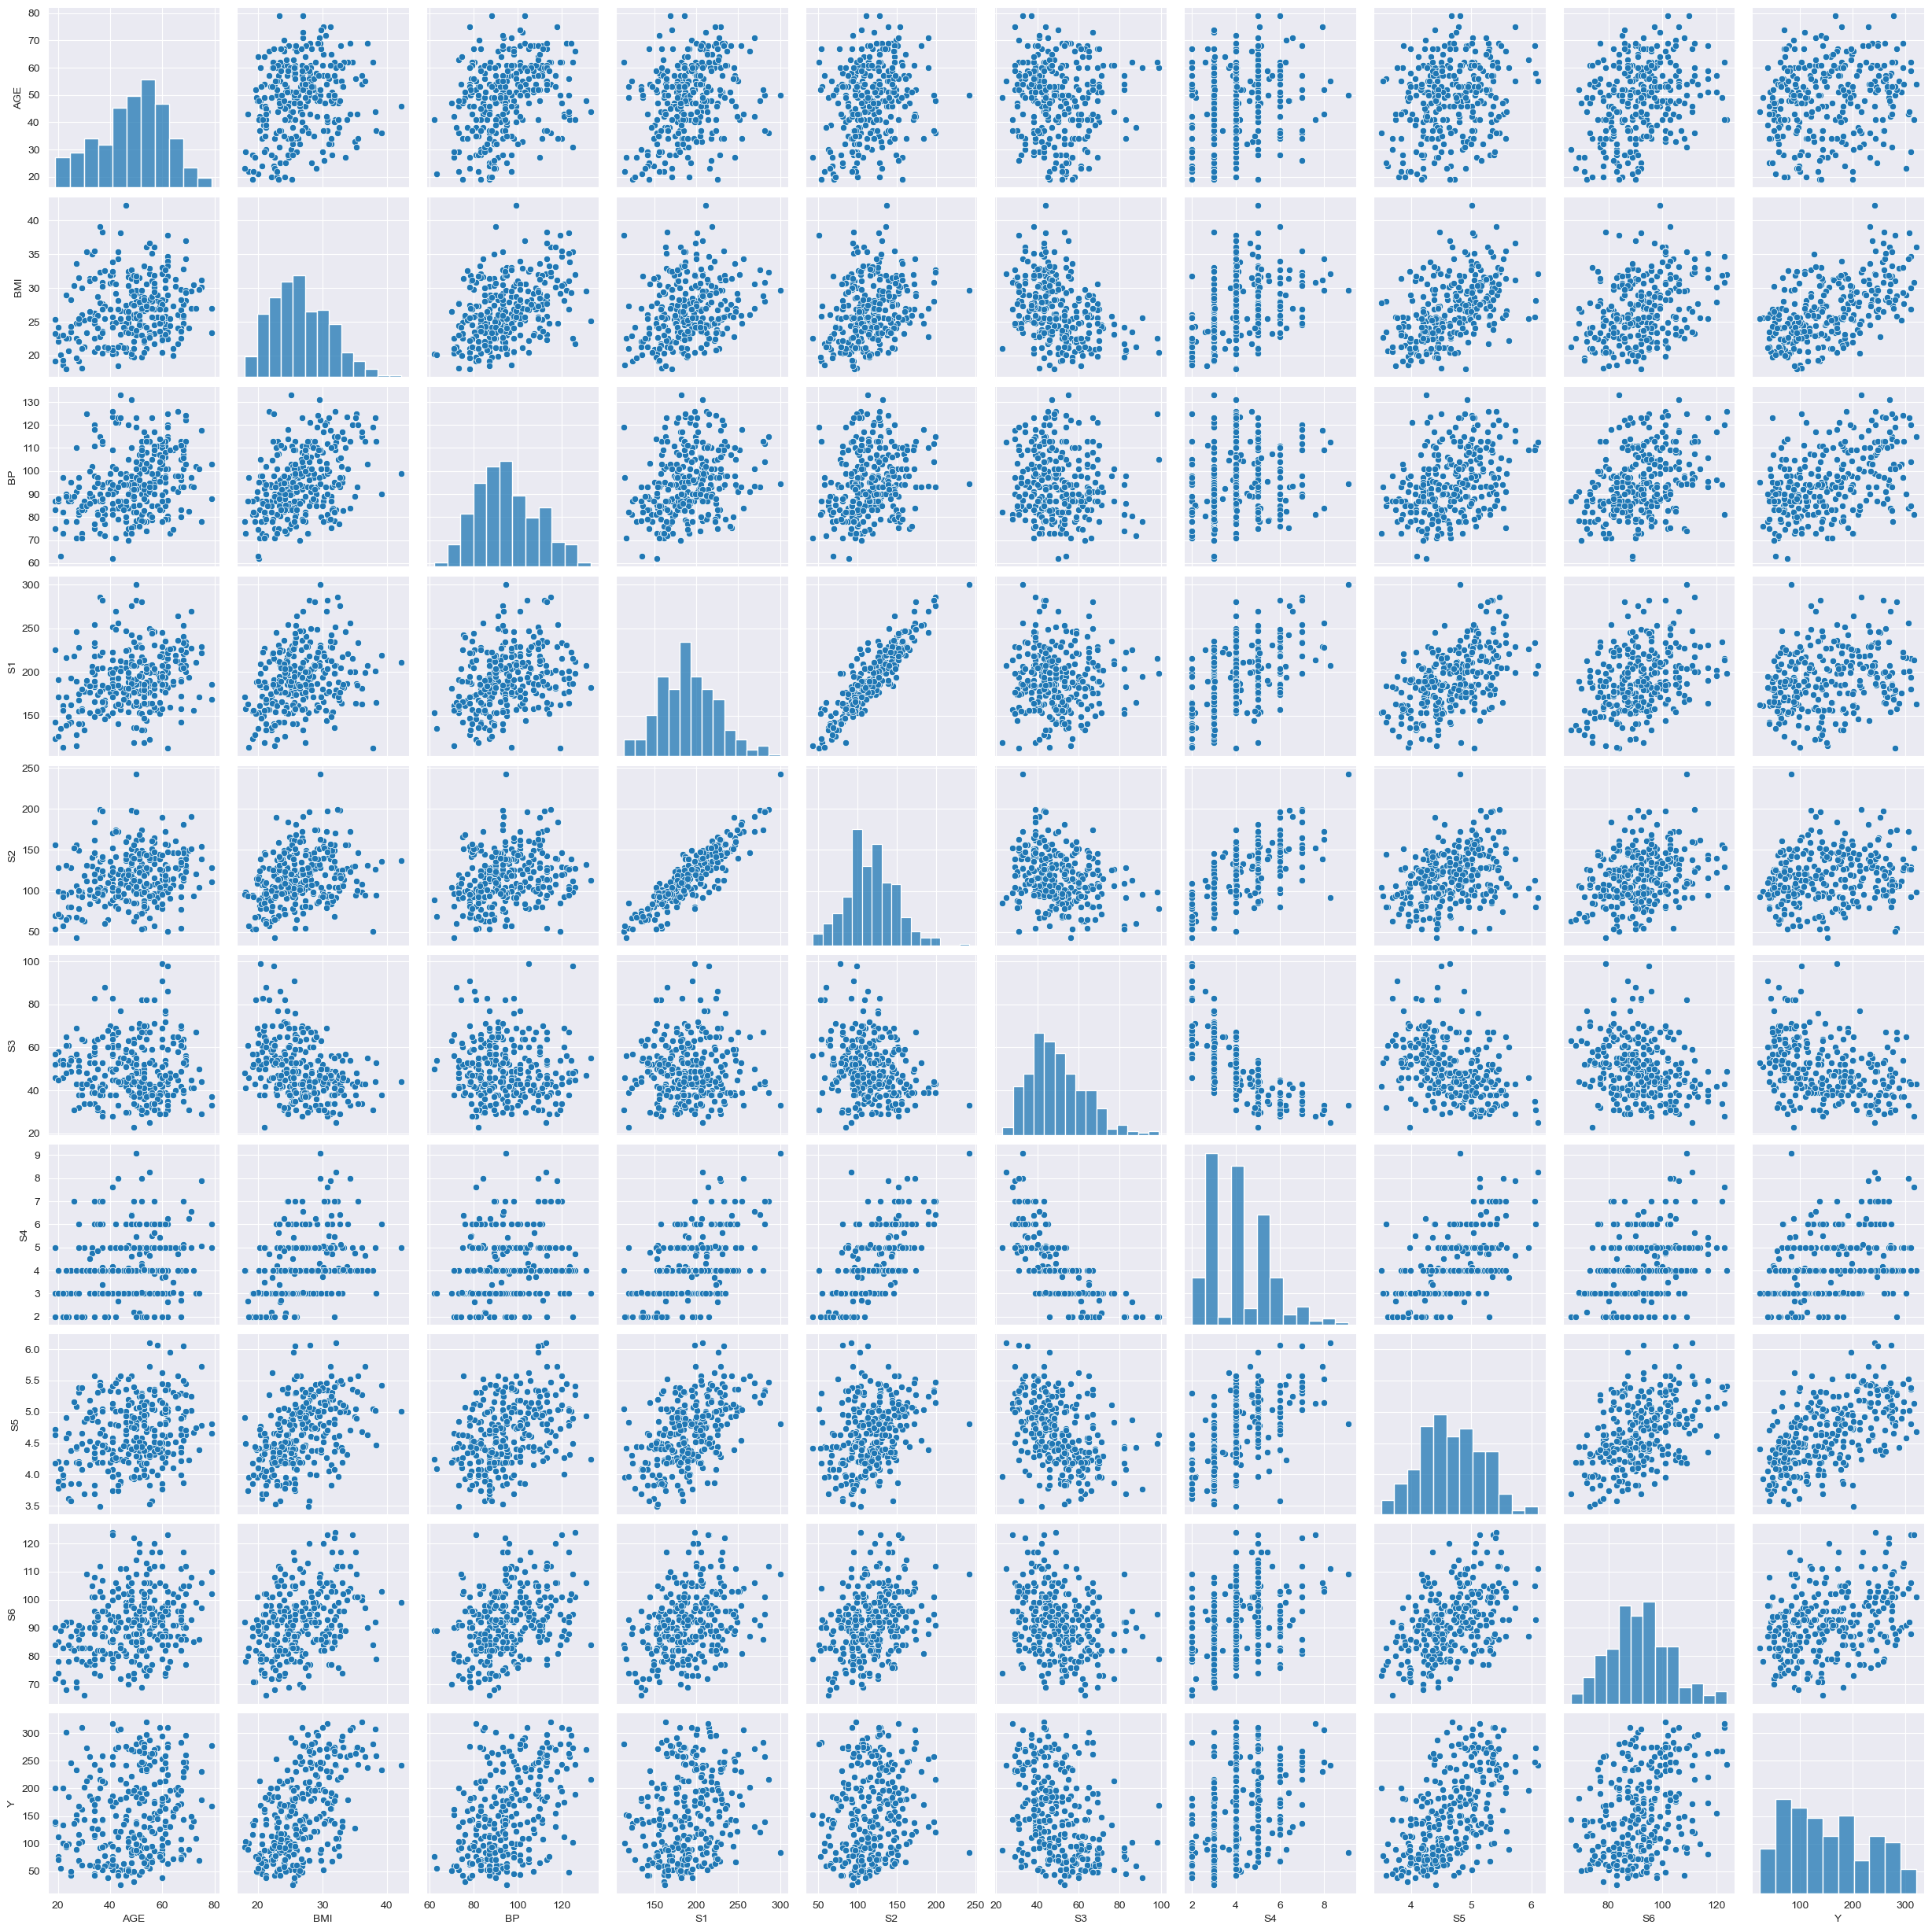

In [33]:
#sns.pairplot(X_train.join(y_train))

Most variables look like they are somewhat close normally distributed. The target variable 'Y' is the exeption to this.   
There appears to be some multicolinearity amoung the dependent variables. Most noticable with 'S1' and 'S2'.

In [186]:
# join the training data
Xy_train = X_train.join(y_train)

<Axes: >

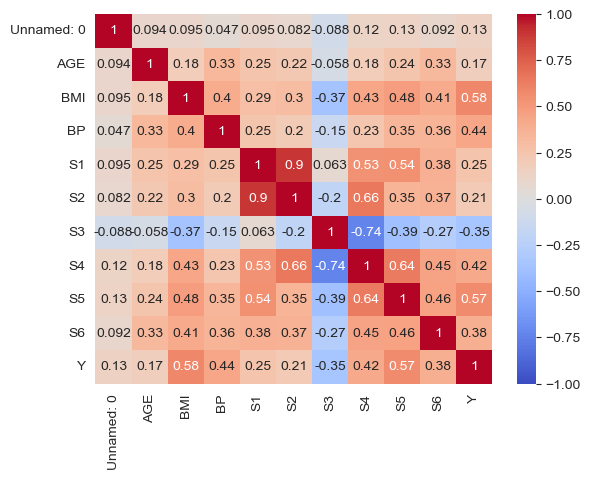

In [150]:
sns.heatmap(Xy_train.select_dtypes(exclude=[object]).corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Looks like the strongest correlation with Y is the BMI and S5 and then BP.

In [187]:
Xy_train

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
152,61,Male,28.2,106.00,204,132.0,52.0,4.00,4.6052,96,237.0
323,46,Male,42.2,99.00,211,137.0,44.0,5.00,5.0106,99,242.0
262,52,Female,29.5,104.33,211,132.8,49.0,4.31,4.9836,98,198.0
210,32,Male,31.4,89.00,153,84.2,56.0,3.00,4.1589,90,187.0
379,62,Male,34.6,120.00,215,129.2,43.0,5.00,5.3660,123,310.0
...,...,...,...,...,...,...,...,...,...,...,...
126,57,Male,30.7,90.00,204,147.8,34.0,6.00,4.7095,93,174.0
370,43,Female,21.3,79.00,141,78.8,53.0,3.00,3.8286,90,42.0
244,68,Female,25.9,93.00,253,181.2,53.0,5.00,4.5433,98,230.0
182,74,Female,29.8,101.00,171,104.8,50.0,3.00,4.3944,86,70.0


***

***

In [188]:
# check first order model
formula = 'Y ~ AGE + C(SEX) + BMI + BP + S1 + S2 + S3 + S4 + S5 + S6'
smf.ols(formula, Xy_train).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.485    
Dependent Variable:   Y                AIC:                3203.6177
Date:                 2023-08-17 18:34 BIC:                3244.1371
No. Observations:     294              Log-Likelihood:     -1590.8  
Df Model:             10               F-statistic:        28.55    
Df Residuals:         283              Prob (F-statistic): 1.61e-37 
R-squared:            0.502            Scale:              3047.5   
--------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept      -312.4003  87.3313 -3.5772 0.0004 -484.3018 -140.4989
C(SEX)[T.Male]  -25.5271   7.1762 -3.5572 0.0004  -39.6526  -11.4016
AGE              -0.0919   0.2647 -0.3473 0.7286   -0.6129    0.4290
BMI               5.2310   0.9008  5.8070 0.0000    3.4578    7.0041
BP                1.2407   0.2801  4.4299 0.0000    0.6894    1.7920
S1               -0.6293   0.8063 -0.7804 0.4358   -2.2165    0.9579
S2                0.3916   0.7468  0.5244 0.6004   -1.0784    1.8617
S3               -0.3192   1.0538 -0.3029 0.7622   -2.3934    1.7551
S4                0.3377   7.4117  0.0456 0.9637  -14.2513   14.9267
S5               60.0501  20.7086  2.8998 0.0040   19.2877  100.8124
S6                0.3845   0.3429  1.1214 0.2631   -0.2904    1.0595
--------------------------------------------------------------------
Omnibus:               0.148         Durbin-Watson:            1.959
Prob(Omnibus):         0.929         Jarque-Bera (JB):         0.275
Skew:                  0.019         Prob(JB):                 0.872
Kurtosis:              2.855         Condition No.:            7580 
====================================================================
* The condition number is large (8e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [132]:
def poly3(X):
    '''
    Function for adding all second order terms plus three-way interactions from an X matrix of quantitative factors.
    It creates squared and two/three-way interaction columns and standardizes them.
    It returns the modified X matrix.
    
    Args:
    * X - the original X matrix

    Returns:
    * A standardized polynomial X matrix with column names matching Patsy formulation
      ensuring that lower-level factors are also included.
    '''
    import scipy.stats as stats   
    X_poly = stats.zscore(X.copy())
    for ii in range(len(X.columns)):
        col1 = X.columns[ii]
        X_poly['I(' + col1 + '**2)'] = X_poly[col1] ** 2
        for jj in range(ii+1,len(X.columns)):
            col2 = X.columns[jj]
            X_poly[col1 + '*' + col2] = X_poly[col1] * X_poly[col2]
            for kk in range(jj+1, len(X.columns)):
                col3 = X.columns[kk]
                X_poly[col1 + '*' + col2 + '*' + col3] = X_poly[col1]*X_poly[col2]*X_poly[col3]
    return X_poly

In [50]:
stats.zscore(X_train.drop(columns='SEX'))

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
152,0.926913,0.345350,0.791401,0.378037,0.478562,0.172563,-0.098290,-0.110324,0.362060
323,-0.196386,3.497845,0.287059,0.583912,0.640428,-0.428279,0.640392,0.676484,0.627069
262,0.252933,0.638082,0.671079,0.583912,0.504460,-0.052753,0.130701,0.624082,0.538733
210,-1.244799,1.065920,-0.433431,-1.121908,-1.068877,0.472985,-0.836971,-0.976512,-0.167960
379,1.001799,1.786491,1.800086,0.701555,0.387917,-0.503384,0.640392,1.366251,2.747147
...,...,...,...,...,...,...,...,...,...
126,0.627366,0.908296,-0.361382,0.378037,0.990058,-1.179332,1.379073,0.092103,0.097050
370,-0.421046,-1.208380,-1.153920,-1.474836,-1.243692,0.247669,-0.836971,-1.617565,-0.167960
244,1.451119,-0.172560,-0.145235,1.819162,2.071323,0.247669,0.640392,-0.230461,0.538733
182,1.900438,0.705635,0.431156,-0.592515,-0.401989,0.022353,-0.836971,-0.519449,-0.521306


In [55]:
X_train.select_dtypes(exclude=object)

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6
152,61,28.2,106.00,204,132.0,52.0,4.00,4.6052,96
323,46,42.2,99.00,211,137.0,44.0,5.00,5.0106,99
262,52,29.5,104.33,211,132.8,49.0,4.31,4.9836,98
210,32,31.4,89.00,153,84.2,56.0,3.00,4.1589,90
379,62,34.6,120.00,215,129.2,43.0,5.00,5.3660,123
...,...,...,...,...,...,...,...,...,...
126,57,30.7,90.00,204,147.8,34.0,6.00,4.7095,93
370,43,21.3,79.00,141,78.8,53.0,3.00,3.8286,90
244,68,25.9,93.00,253,181.2,53.0,5.00,4.5433,98
182,74,29.8,101.00,171,104.8,50.0,3.00,4.3944,86


In [71]:
# start will all 2nd degree terms and interactions
formula = 'Y ~ AGE * C(SEX) * BMI * BP * S1 * S2 * S3'# * S4 * S5 * S6'# + I(AGE**2) + I(BMI**2) + I(BP**2) + I(S1**2) + I(S2**2) + I(S3**2) + I(S4**2) + I(S5**2) + I(S6**2)'

In [72]:
model = smf.ols(formula, Xy_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                      Adj. R-squared:             0.483    
Dependent Variable:          Y                        AIC:                        3279.0504
Date:                        2023-08-16 20:49         BIC:                        3717.3964
No. Observations:            294                      Log-Likelihood:             -1520.5  
Df Model:                    118                      F-statistic:                3.322    
Df Residuals:                175                      Prob (F-statistic):         3.15e-13 
R-squared:                   0.691                    Scale:                      3055.3   
-------------------------------------------------------------------------------------------
                                     Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------------------------------
Intercept                             83.3502   74.4213  1.1200 0.2643   -63.5286  230.2289
C(SEX)[T.Male]                       -75.0908   99.3500 -0.7558 0.4508  -271.1693  120.9876
AGE                                   86.6408 1702.0717  0.0509 0.9595 -3272.5891 3445.8707
AGE:C(SEX)[T.Male]                  -751.9932 2038.1275 -0.3690 0.7126 -4774.4670 3270.4806
BMI                                 1251.6923 1368.5905  0.9146 0.3617 -1449.3749 3952.7596
C(SEX)[T.Male]:BMI                 -2429.5027 2357.2006 -1.0307 0.3041 -7081.7031 2222.6977
AGE:BMI                              -27.2747   66.4799 -0.4103 0.6821  -158.4803  103.9309
AGE:C(SEX)[T.Male]:BMI                88.1972   90.4154  0.9755 0.3307   -90.2477  266.6421
BP                                  -436.0973  234.3418 -1.8609 0.0644  -898.5973   26.4027
C(SEX)[T.Male]:BP                   1034.1715  585.4257  1.7665 0.0791  -121.2320 2189.5750
AGE:BP                                 7.2794   16.7914  0.4335 0.6652   -25.8604   40.4191
AGE:C(SEX)[T.Male]:BP                -14.3933   21.0352 -0.6842 0.4947   -55.9086   27.1220
BMI:BP                                 3.1653   17.1836  0.1842 0.8541   -30.7484   37.0790
C(SEX)[T.Male]:BMI:BP                -16.9508   25.7608 -0.6580 0.5114   -67.7925   33.8910
AGE:BMI:BP                            -0.0074    0.6649 -0.0112 0.9911    -1.3198    1.3049
AGE:C(SEX)[T.Male]:BMI:BP             -0.0329    0.8441 -0.0390 0.9689    -1.6989    1.6331
S1                                   -65.4201  414.4449 -0.1579 0.8748  -883.3737  752.5335
C(SEX)[T.Male]:S1                   -655.6677  852.7473 -0.7689 0.4430 -2338.6605 1027.3250
AGE:S1                                 1.0280    8.6865  0.1183 0.9059   -16.1157   18.1718
AGE:C(SEX)[T.Male]:S1                 16.7028   18.2558  0.9149 0.3615   -19.3271   52.7328
BMI:S1                                -7.5655   16.0446 -0.4715 0.6379   -39.2313   24.1004
C(SEX)[T.Male]:BMI:S1                 42.8866   37.2728  1.1506 0.2515   -30.6754  116.4487
AGE:BMI:S1                             0.1468    0.3389  0.4330 0.6655    -0.5222    0.8157
AGE:C(SEX)[T.Male]:BMI:S1             -1.0287    0.8122 -1.2666 0.2070    -2.6316    0.5742
BP:S1                                  4.0838    4.9876  0.8188 0.4140    -5.7597   13.9273
C(SEX)[T.Male]:BP:S1                   0.6451    9.1589  0.0704 0.9439   -17.4311   18.7212
AGE:BP:S1                             -0.0726    0.0858 -0.8462 0.3986    -0.2419    0.0967
AGE:C(SEX)[T.Male]:BP:S1              -0.0438    0.1786 -0.2450 0.8068    -0.3963    0.3088
BMI:BP:S1                             -0.0474    0.1888 -0.2510 0.8021    -0.4200    0.3252
C(SEX)[T.Male]:BMI:BP:S1              -0.1998    0.3765 -0.5307 0.5963    -0.9428    0.5432
AGE:BMI:BP:S1                          0.0007    0.0033  0.2153 0.8298    -0.0058    0.0073
AGE:C(SEX)[T.Male]:BMI:BP

In [170]:
class PatsyFormula():
    def __init__(self, target_var:str, terms=[]):
        self.target_var = target_var
        self.terms = terms
        self.formula = self._build_formula()
        
    def _build_formula(self):
        formula = f'{self.target_var} ~ '
        for term in self.terms:
            formula += f'{term} + '
        formula = formula[:-3]
        return formula
    
    def add_term(self, term):
        self.terms.append(term)
        self.formula = self._build_formula()
        

            

In [174]:
pf = PatsyFormula('Y')

In [176]:
pf.add_term('SEX')
pf.formula

'Y ~ AGE + SEX'

In [73]:
X_train.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

In [78]:
list(X_train.select_dtypes(object).columns)

['SEX']

In [105]:
term_list = []
for col in list(X_train.select_dtypes(object).columns):
    term_list.append(f'C({col})')
for col in list(X_train.select_dtypes(exclude=object).columns):
    term_list.append(col)
    # term_list.append(f'I({col}**2)')
term_list

['C(SEX)', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

In [88]:
def add_to_formula(formula,term):
    if formula[-1] == '~':
        formula += f' {term}'
    else: 
        formula += f' + {term}'
    return formula

In [95]:
def get_forward_regression_results(formula, terms, data):
    print('Term       :    R2a      AIC       BIC')
    for next_term in terms:
        model = smf.ols(add_to_formula(formula,next_term), data=data).fit()
        print(f'{next_term:10} : {model.rsquared_adj:7.4f}   {model.aic:7.3f}   {model.bic:7.3f}')

In [106]:
formula = 'Y ~'
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
C(SEX)     : -0.0032   3390.602   3397.969
AGE        :  0.0260   3381.935   3389.302
BMI        :  0.3282   3272.729   3280.096
BP         :  0.1997   3324.190   3331.558
S1         :  0.0465   3375.677   3383.045
S2         :  0.0256   3382.043   3389.410
S3         :  0.1196   3352.218   3359.585
S4         :  0.1457   3343.368   3350.735
S5         :  0.3129   3279.329   3286.696
S6         :  0.1212   3351.672   3359.039


In [107]:
add_term = 'BMI'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
C(SEX)     :  0.3278   3273.876   3284.926
AGE        :  0.3296   3273.094   3284.144
BP         :  0.3788   3250.676   3261.727
S1         :  0.3302   3272.849   3283.900
S2         :  0.3260   3274.674   3285.724
S3         :  0.3493   3264.326   3275.376
S4         :  0.3518   3263.212   3274.263
S5         :  0.4351   3222.745   3233.795
S6         :  0.3526   3262.849   3273.900


In [108]:
add_term = 'S5'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
C(SEX)     :  0.4417   3220.287   3235.022
AGE        :  0.4332   3224.744   3239.479
BP         :  0.4577   3211.729   3226.464
S1         :  0.4412   3220.572   3235.306
S2         :  0.4372   3222.642   3237.376
S3         :  0.4370   3222.774   3237.508
S4         :  0.4333   3224.671   3239.406
S6         :  0.4355   3223.546   3238.280


In [109]:
add_term = 'C(SEX)'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
AGE        :  0.4398   3222.260   3240.678
BP         :  0.4687   3206.724   3225.142
S1         :  0.4479   3217.975   3236.393
S2         :  0.4425   3220.874   3239.291
S3         :  0.4494   3217.215   3235.633
S4         :  0.4401   3222.134   3240.552
S6         :  0.4439   3220.134   3238.552


In [110]:
add_term = 'BP'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
AGE        :  0.4678   3208.166   3230.268
S1         :  0.4794   3201.709   3223.811
S2         :  0.4704   3206.719   3228.821
S3         :  0.4843   3198.930   3221.032
S4         :  0.4683   3207.915   3230.016
S6         :  0.4682   3207.932   3230.033


In [111]:
add_term = 'S3'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
AGE        :  0.4828   3200.747   3226.532
S1         :  0.4888   3197.343   3223.128
S2         :  0.4880   3197.775   3223.560
S4         :  0.4866   3198.611   3224.396
S6         :  0.4838   3200.189   3225.974


In [112]:
add_term = 'S1'
formula = add_to_formula(formula, add_term)
term_list.remove(add_term)
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
AGE        :  0.4870   3199.318   3228.786
S2         :  0.4876   3198.970   3228.439
S4         :  0.4870   3199.343   3228.811
S6         :  0.4893   3198.025   3227.494


In [113]:
# Look at first order model
model = smf.ols(formula, Xy_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:                OLS              Adj. R-squared:     0.489    
Dependent Variable:   Y                AIC:                3197.3426
Date:                 2023-08-16 21:35 BIC:                3223.1277
No. Observations:     294              Log-Likelihood:     -1591.7  
Df Model:             6                F-statistic:        47.69    
Df Residuals:         287              Prob (F-statistic): 2.10e-40 
R-squared:            0.499            Scale:              3022.7   
--------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
Intercept      -260.2436  42.2226 -6.1636 0.0000 -343.3489 -177.1384
C(SEX)[T.Male]  -24.5346   7.0634 -3.4735 0.0006  -38.4372  -10.6321
BMI               5.3519   0.8907  6.0089 0.0000    3.5988    7.1049
S5               52.0997   8.6428  6.0281 0.0000   35.0883   69.1111
BP                1.2618   0.2696  4.6799 0.0000    0.7311    1.7925
S3               -0.7576   0.3022 -2.5066 0.0127   -1.3525   -0.1627
S1               -0.2150   0.1146 -1.8771 0.0615   -0.4405    0.0104
--------------------------------------------------------------------
Omnibus:               0.175         Durbin-Watson:            1.936
Prob(Omnibus):         0.916         Jarque-Bera (JB):         0.280
Skew:                  0.047         Prob(JB):                 0.870
Kurtosis:              2.881         Condition No.:            2964 
====================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [114]:
formula

'Y ~ BMI + S5 + C(SEX) + BP + S3 + S1'

In [115]:
# add interation terms with the current variables
formula = formula.replace('+','*')
formula

'Y ~ BMI * S5 * C(SEX) * BP * S3 * S1'

In [116]:
model = smf.ols(formula, Xy_train).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
==============================================================================================
Model:                        OLS                       Adj. R-squared:              0.474    
Dependent Variable:           Y                         AIC:                         3254.4520
Date:                         2023-08-16 21:39          BIC:                         3490.2011
No. Observations:             294                       Log-Likelihood:              -1563.2  
Df Model:                     63                        F-statistic:                 5.196    
Df Residuals:                 230                       Prob (F-statistic):          1.54e-20 
R-squared:                    0.587                     Scale:                       3108.2   
----------------------------------------------------------------------------------------------
                                  Coef.      Std.Err.     t    P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------------------
Intercept                      -90296.8574 100548.5030 -0.8980 0.3701 -288410.7676 107817.0528
C(SEX)[T.Male]                 192832.0858 158586.3618  1.2159 0.2253 -119635.6616 505299.8332
BMI                              3738.8310   3554.0755  1.0520 0.2939   -3263.8769  10741.5389
BMI:C(SEX)[T.Male]              -7634.9575   6155.7681 -1.2403 0.2161  -19763.8629   4493.9479
S5                              19066.6824  21878.6218  0.8715 0.3844  -24041.4614  62174.8262
S5:C(SEX)[T.Male]              -41678.1411  33314.4202 -1.2511 0.2122 -107318.6017  23962.3195
BMI:S5                           -783.3411    761.1028 -1.0292 0.3045   -2282.9662    716.2839
BMI:S5:C(SEX)[T.Male]            1661.2874   1274.9132  1.3031 0.1939    -850.7145   4173.2893
BP                                837.8562   1096.1113  0.7644 0.4454   -1321.8467   2997.5592
C(SEX)[T.Male]:BP               -2029.1084   1744.5264 -1.1631 0.2460   -5466.4042   1408.1874
BMI:BP                            -34.3607     38.6610 -0.8888 0.3751    -110.5357     41.8143
BMI:C(SEX)[T.Male]:BP              79.4428     67.2176  1.1819 0.2385     -52.9982    211.8838
S5:BP                            -177.9415    238.4788 -0.7462 0.4563    -647.8239    291.9410
S5:C(SEX)[T.Male]:BP              430.0593    364.6468  1.1794 0.2395    -288.4159   1148.5346
BMI:S5:BP                           7.2811      8.2759  0.8798 0.3799      -9.0251     23.5873
BMI:S5:C(SEX)[T.Male]:BP          -17.0117     13.8558 -1.2278 0.2208     -44.3122     10.2887
S3                               2026.7569   2022.7187  1.0020 0.3174   -1958.6699   6012.1838
C(SEX)[T.Male]:S3               -3781.2907   3569.9377 -1.0592 0.2906  -10815.2524   3252.6709
BMI:S3                            -84.3613     72.4458 -1.1645 0.2454    -227.1036     58.3811
BMI:C(SEX)[T.Male]:S3             158.0288    140.7525  1.1227 0.2627    -119.3003    435.3579
S5:S3                            -439.7067    443.5794 -0.9913 0.3226   -1313.7053    434.2918
S5:C(SEX)[T.Male]:S3              829.7618    749.1576  1.1076 0.2692    -646.3272   2305.8508
BMI:S5:S3                          18.1461     15.6771  1.1575 0.2483     -12.7431     49.0353
BMI:S5:C(SEX)[T.Male]:S3          -34.8619     29.1906 -1.1943 0.2336     -92.3772     22.6533
BP:S3                             -19.1309     22.1456 -0.8639 0.3886     -62.7650     24.5033
C(SEX)[T.Male]:BP:S3               39.1191     39.1683  0.9987 0.3190     -38.0553    116.2936
BMI:BP:S3                           0.7915      0.7901  1.0017 0.3175      -0.7653      2.3483
BMI:C(SEX)[T.Male]:BP:S3           -1.6232      1.5330 -1.0589 0.2908      -4.6437      1.3973
S5:BP:S3                            4.1882      4.8524  0.8631 0.3890      -5.3727     13.7491
S5:C(SEX)[T.Male]:BP:S3            -8.4210      8.1777 -1.0298 0.3042     -24.5338      

In [178]:
formula = 'Y ~'
term_list = ['C(SEX)', 'AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
C(SEX)     : -0.0030   3365.953   3373.307
AGE        :  0.0242   3357.937   3365.291
BMI        :  0.3371   3245.040   3252.393
BP         :  0.1885   3304.111   3311.465
S1         :  0.0612   3346.655   3354.008
S2         :  0.0405   3353.003   3360.356
S3         :  0.1200   3327.763   3335.117
S4         :  0.1695   3310.857   3318.211
S5         :  0.3200   3252.479   3259.833
S6         :  0.1442   3319.619   3326.972


In [179]:
formula = 'Y ~ S5'
term_list.remove('S5')
get_forward_regression_results(formula, term_list, Xy_train)

Term       :    R2a      AIC       BIC
C(SEX)     :  0.3221   3252.540   3263.570
AGE        :  0.3182   3254.244   3265.274
BMI        :  0.4455   3193.875   3204.905
BP         :  0.3842   3224.483   3235.513
S1         :  0.3206   3253.215   3264.245
S2         :  0.3181   3254.296   3265.327
S3         :  0.3372   3246.002   3257.032
S4         :  0.3235   3251.952   3262.982
S6         :  0.3369   3246.112   3257.143


In [ ]:
formula = 'Y ~ S5*'
term_list.remove('S5')
get_forward_regression_results(formula, term_list, Xy_train)

***
## LASSO

In [135]:
from sklearn.linear_model import Lasso

In [128]:
# create dummy variable for SEX, will use Male = 1
X_train['Male'] = 0
X_train.loc[X_train['SEX']=='Male', 'Male'] = 1

In [129]:
# drop the SEX column
X_train = X_train.drop(columns='SEX')

In [133]:
X_poly = poly3(X_train)

C:\Users\elder\AppData\Local\Temp\ipykernel_23676\913623567.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_poly[col1 + '*' + col2 + '*' + col3] = X_poly[col1]*X_poly[col2]*X_poly[col3]
C:\Users\elder\AppData\Local\Temp\ipykernel_23676\913623567.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_poly[col1 + '*' + col2] = X_poly[col1] * X_poly[col2]
C:\Users\elder\AppData\Local\Temp\ipykernel_23676\913623567.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

In [134]:
X_poly

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Male,...,S4*S6,S4*S6*Male,S4*Male,I(S5**2),S5*S6,S5*S6*Male,S5*Male,I(S6**2),S6*Male,I(Male**2)
152,0.926913,0.345350,0.791401,0.378037,0.478562,0.172563,-0.098290,-0.110324,0.362060,1.077852,...,-0.035587,-0.038357,-0.105942,0.012171,-0.039944,-0.043054,-0.118913,0.131087,0.390247,1.161765
323,-0.196386,3.497845,0.287059,0.583912,0.640428,-0.428279,0.640392,0.676484,0.627069,1.077852,...,0.401570,0.432833,0.690247,0.457631,0.424202,0.457227,0.729150,0.393216,0.675888,1.161765
262,0.252933,0.638082,0.671079,0.583912,0.504460,-0.052753,0.130701,0.624082,0.538733,-0.927771,...,0.070413,-0.065327,-0.121261,0.389478,0.336213,-0.311929,-0.579005,0.290233,-0.499821,0.860759
210,-1.244799,1.065920,-0.433431,-1.121908,-1.068877,0.472985,-0.836971,-0.976512,-0.167960,1.077852,...,0.140577,0.151522,-0.902131,0.953576,0.164015,0.176784,-1.052536,0.028210,-0.181036,1.161765
379,1.001799,1.786491,1.800086,0.701555,0.387917,-0.503384,0.640392,1.366251,2.747147,1.077852,...,1.759250,1.896211,0.690247,1.866643,3.753293,4.045494,1.472617,7.546815,2.961017,1.161765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.627366,0.908296,-0.361382,0.378037,0.990058,-1.179332,1.379073,0.092103,0.097050,1.077852,...,0.133839,0.144259,1.486437,0.008483,0.008939,0.009634,0.099274,0.009419,0.104606,1.161765
370,-0.421046,-1.208380,-1.153920,-1.474836,-1.243692,0.247669,-0.836971,-1.617565,-0.167960,-0.927771,...,0.140577,-0.130424,0.776518,2.616517,0.271686,-0.252062,1.500730,0.028210,0.155828,0.860759
244,1.451119,-0.172560,-0.145235,1.819162,2.071323,0.247669,0.640392,-0.230461,0.538733,-0.927771,...,0.345000,-0.320081,-0.594137,0.053112,-0.124157,0.115189,0.213815,0.290233,-0.499821,0.860759
182,1.900438,0.705635,0.431156,-0.592515,-0.401989,0.022353,-0.836971,-0.519449,-0.521306,-0.927771,...,0.436318,-0.404803,0.776518,0.269827,0.270792,-0.251233,0.481930,0.271760,0.483653,0.860759


In [137]:
coefs = pd.DataFrame(columns=X_poly.columns)
for alpha in np.arange(0.001,0.1,0.001):
    lm = Lasso(alpha=alpha, max_iter=100000)
    lm.fit(X_poly, y_train)
    coefs.loc[alpha] = lm.coef_

C:\Users\elder\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+05, tolerance: 1.732e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\elder\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.813e+04, tolerance: 1.732e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\elder\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+04, toleranc

In [141]:
from sklearn import datasets

In [143]:
#importing dataset
diab = datasets.load_diabetes()

#definine feature and label
features = diab['data']
label = diab['target']
X = pd.DataFrame(features, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
X.head()


,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [144]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1